<a href="https://colab.research.google.com/github/sajjadhaghighat/NeuralNetwork/blob/master/HW4_Datamining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# پیش پردازش

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


bank = pd.read_csv("bank.csv")
bank.shape

(11162, 17)

In [ ]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [ ]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


# one_hot تبدیل ویژگی های اسمی به عددی با

In [ ]:
bank['deposit'].replace(to_replace='yes', value=1, inplace=True)
bank['deposit'].replace(to_replace='no',  value=0, inplace=True)

bank['loan'].replace(to_replace='no', value=1, inplace=True)
bank['loan'].replace(to_replace='yes',  value=0, inplace=True)

bank['default'].replace(to_replace='no', value=1, inplace=True)
bank['default'].replace(to_replace='yes',  value=0, inplace=True)

bank['housing'].replace(to_replace='no', value=1, inplace=True)
bank['housing'].replace(to_replace='yes',  value=0, inplace=True)

one_hot = pd.get_dummies(bank['marital'])
bank = bank.drop('marital',axis = 1)
bank = bank.join(one_hot)
bank = bank.drop('divorced',axis = 1)

one_hot = pd.get_dummies(bank['education'])
bank = bank.drop('education',axis = 1)
bank = bank.join(one_hot)
bank = bank.drop('unknown',axis = 1)

one_hot = pd.get_dummies(bank['job'])
bank = bank.drop('job',axis = 1)
bank = bank.join(one_hot)
bank = bank.drop('unknown',axis = 1)

one_hot = pd.get_dummies(bank['contact'])
bank = bank.drop('contact',axis = 1)
bank = bank.join(one_hot)
bank = bank.drop('unknown',axis = 1)

one_hot = pd.get_dummies(bank['month'])
bank = bank.drop('month',axis = 1)
bank = bank.join(one_hot)
bank = bank.drop('dec',axis = 1)

one_hot = pd.get_dummies(bank['poutcome'])
bank = bank.drop('poutcome',axis = 1)
bank = bank.join(one_hot)
bank = bank.drop('other',axis = 1)

bank.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,jul,jun,mar,may,nov,oct,sep,failure,success,unknown
0,59,1,2343,0,1,5,1042,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
1,56,1,45,1,1,5,1467,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
2,41,1,1270,0,1,5,1389,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
3,55,1,2476,0,1,5,579,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
4,54,1,184,1,1,5,673,2,-1,0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
tempDF=bank['deposit']
bank=bank.drop('deposit',axis=1)
bank['deposit']=tempDF
bank.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,jun,mar,may,nov,oct,sep,failure,success,unknown,deposit
0,59,1,2343,0,1,5,1042,1,-1,0,...,0,0,1,0,0,0,0,0,1,1
1,56,1,45,1,1,5,1467,1,-1,0,...,0,0,1,0,0,0,0,0,1,1
2,41,1,1270,0,1,5,1389,1,-1,0,...,0,0,1,0,0,0,0,0,1,1
3,55,1,2476,0,1,5,579,1,-1,0,...,0,0,1,0,0,0,0,0,1,1
4,54,1,184,1,1,5,673,2,-1,0,...,0,0,1,0,0,0,0,0,1,1


In [ ]:
bank.to_csv("PreprocessedBank.csv")

In [ ]:
df=pd.read_csv("PreprocessedBank.csv").drop(['Unnamed: 0'],axis=1)

df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,jun,mar,may,nov,oct,sep,failure,success,unknown,deposit
0,59,1,2343,0,1,5,1042,1,-1,0,...,0,0,1,0,0,0,0,0,1,1
1,56,1,45,1,1,5,1467,1,-1,0,...,0,0,1,0,0,0,0,0,1,1
2,41,1,1270,0,1,5,1389,1,-1,0,...,0,0,1,0,0,0,0,0,1,1
3,55,1,2476,0,1,5,579,1,-1,0,...,0,0,1,0,0,0,0,0,1,1
4,54,1,184,1,1,5,673,2,-1,0,...,0,0,1,0,0,0,0,0,1,1


# نرمالسازی استاندارد

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(bank.drop('deposit',axis=1))
scaled_features=scaler.transform(bank.drop('deposit',axis=1))
bank_feat=pd.DataFrame(scaled_features,columns=bank.columns[:-1])
bank_feat.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,jul,jun,mar,may,nov,oct,sep,failure,success,unknown
0,1.491505,0.123617,0.252525,-1.055280,0.387923,-1.265746,1.930226,-0.554168,-0.481184,-0.36326,...,-0.396136,-0.350625,-0.159228,1.718298,-0.303775,-0.190781,-0.171522,-0.35159,-0.325782,0.583626
1,1.239676,0.123617,-0.459974,0.947616,0.387923,-1.265746,3.154612,-0.554168,-0.481184,-0.36326,...,-0.396136,-0.350625,-0.159228,1.718298,-0.303775,-0.190781,-0.171522,-0.35159,-0.325782,0.583626
2,-0.019470,0.123617,-0.080160,-1.055280,0.387923,-1.265746,2.929901,-0.554168,-0.481184,-0.36326,...,-0.396136,-0.350625,-0.159228,1.718298,-0.303775,-0.190781,-0.171522,-0.35159,-0.325782,0.583626
3,1.155733,0.123617,0.293762,-1.055280,0.387923,-1.265746,0.596366,-0.554168,-0.481184,-0.36326,...,-0.396136,-0.350625,-0.159228,1.718298,-0.303775,-0.190781,-0.171522,-0.35159,-0.325782,0.583626
4,1.071790,0.123617,-0.416876,0.947616,0.387923,-1.265746,0.867171,-0.186785,-0.481184,-0.36326,...,-0.396136,-0.350625,-0.159228,1.718298,-0.303775,-0.190781,-0.171522,-0.35159,-0.325782,0.583626


In [ ]:
bank_feat['deposit']=tempDF
bank_feat.to_csv("standardisedBank.csv")

In [ ]:
bank_feat.shape

(11162, 43)

# آماده سازی داده های یادگیری و آزمون - روش سی درصد تست و هفتاد درصد یادگیری

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(scaled_features,df['deposit'],test_size=0.30, random_state=3)

## KNN

پیدا کردن k بهینه

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
accuracy_rate=[]
for i in range(1,40,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X_train,y_train,cv=10)
    accuracy_rate.append(score.mean())
print(accuracy_rate)

[0.728145763677625, 0.7556652399867703, 0.7614259376299649, 0.7620659787602622, 0.7641156167416029, 0.7610418147106307, 0.7593762996486241, 0.7578411178533653, 0.7560493629061044, 0.7560495266413642, 0.7531065490829187, 0.7538739762452884, 0.7509314898926224, 0.7488831617933596, 0.7499069983724714, 0.747474219883355, 0.7472183016723919, 0.7474753660301732, 0.7472196115544698, 0.7465807165709907]


Text(0, 0.5, 'Accuracy rate')

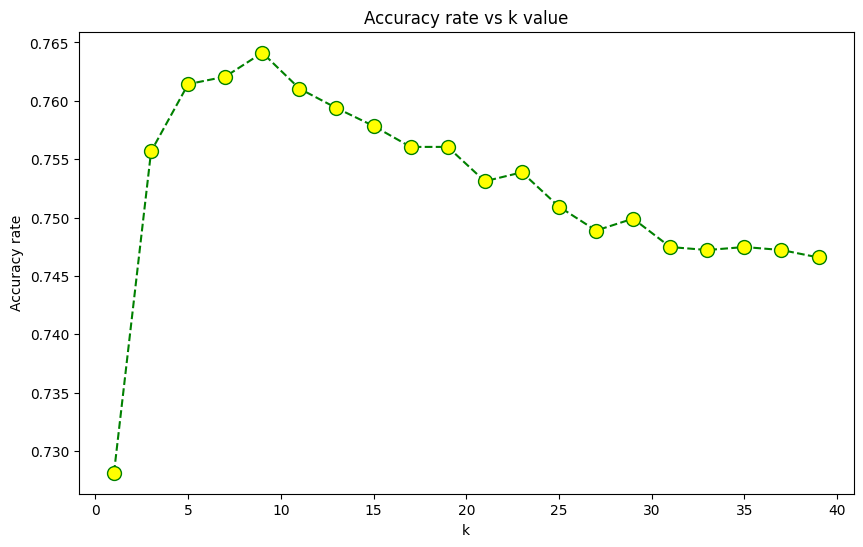

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40,2),accuracy_rate,color='green',linestyle='dashed',marker='o',markerfacecolor='yellow',markersize=10)
plt.title('Accuracy rate vs k value')
plt.xlabel('k')
plt.ylabel('Accuracy rate')

# k = 9 بهینه

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("Test Accuracy score for KNN is ",accuracy_score(y_test, pred))
predT=knn.predict(X_train)
print("Train Accuracy score for KNN is ",accuracy_score(y_train, predT))

[[1484  290]
 [ 554 1021]]
              precision    recall  f1-score   support

           0       0.73      0.84      0.78      1774
           1       0.78      0.65      0.71      1575

    accuracy                           0.75      3349
   macro avg       0.75      0.74      0.74      3349
weighted avg       0.75      0.75      0.75      3349

Test Accuracy score for KNN is  0.7479844729770081
Train Accuracy score for KNN is  0.8123640087034429


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt=DecisionTreeClassifier()
parameters={'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
            'min_samples_leaf':[1,2,3,4,5],
            'min_samples_split':[2,3,4,5],
            'criterion':['gini','entropy']}

In [ ]:
clf = GridSearchCV(dt,parameters,scoring='accuracy',verbose=True)
best_clf = clf.fit(X_train,y_train)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


In [ ]:
pred = best_clf.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("Test Accuracy score for DT is ",accuracy_score(y_test, pred))
predT=best_clf.predict(X_train)
print("Train Accuracy score for DT is ",accuracy_score(y_train, predT))

[[1386  388]
 [ 236 1339]]
              precision    recall  f1-score   support

           0       0.85      0.78      0.82      1774
           1       0.78      0.85      0.81      1575

    accuracy                           0.81      3349
   macro avg       0.81      0.82      0.81      3349
weighted avg       0.82      0.81      0.81      3349

Test Accuracy score for DT is  0.8136757240967453
Train Accuracy score for DT is  0.8492256495584283


# SVM

In [ ]:
from sklearn.svm import SVC

classifier = SVC(probability=True)
parameters=[{'C':[1],'kernel':['linear']}]

In [ ]:
clf = GridSearchCV(estimator=classifier,param_grid=parameters,scoring='accuracy')
best_clf = clf.fit(X_train,y_train)

In [ ]:
pred = best_clf.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("Test Accuracy score for SVM is ",accuracy_score(y_test, pred))
predT=best_clf.predict(X_train)
print("Train Accuracy score for SVM is ",accuracy_score(y_train, predT))
print("Best parameters for SVM are ",best_clf.best_params_)

[[1484  290]
 [ 300 1275]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1774
           1       0.81      0.81      0.81      1575

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349

Test Accuracy score for SVM is  0.8238280083607047
Train Accuracy score for SVM is  0.8315627799820812
Best parameters for SVM are  {'C': 1, 'kernel': 'linear'}


# Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,recall_score

gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred = gnb.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("Test Accuracy score for NB is ",accuracy_score(y_test, pred))
predT=gnb.predict(X_train)
print("Train Accuracy score for NB is ",accuracy_score(y_train, predT))
#print("Best parameters for NB are ",gnb.best_params_)
print("Recall score for NB is ",recall_score(y_test, pred))

[[1517  257]
 [ 737  838]]
              precision    recall  f1-score   support

           0       0.67      0.86      0.75      1774
           1       0.77      0.53      0.63      1575

    accuracy                           0.70      3349
   macro avg       0.72      0.69      0.69      3349
weighted avg       0.72      0.70      0.69      3349

Test Accuracy score for NB is  0.7031949835771872
Train Accuracy score for NB is  0.7317291693331627
Recall score for NB is  0.532063492063492


In [ ]:
import numpy as np
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings("ignore")

y=np.array(bank['deposit'].copy())
X=np.array(bank.drop('deposit',axis=1).copy())
kf = KFold(n_splits=5)
i = 1
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    print("Fold ",i," -----------------------------------")
    print("KNN   --------------------------------------------------------------")
    knn = KNeighborsClassifier(n_neighbors=9)
    knn.fit(X_train,y_train)
    pred=knn.predict(X_test)
    print(classification_report(y_test,pred))
    print("Test Accuracy score for KNN is ",accuracy_score(y_test, pred))
    predT=knn.predict(X_train)
    print("Train Accuracy score for KNN is ",accuracy_score(y_train, predT))
    print("---------------------------------------------------------------------")

    print("DecisionTree  -------------------------------------------------------")
    dt=DecisionTreeClassifier(criterion='gini', max_depth=8, min_samples_leaf=5, min_samples_split=3)
    dt.fit(X_train,y_train)
    pred = dt.predict(X_test)
    print(classification_report(y_test,pred))
    print("Test Accuracy score for DT is ",accuracy_score(y_test, pred))
    predT=dt.predict(X_train)
    print("Train Accuracy score for DT is ",accuracy_score(y_train, predT))
    print("---------------------------------------------------------------------")

    print("SVM  -------------------------------------------------------")
    svm = SVC(probability=True)
    svm = svm.fit(X_train,y_train)
    pred = svm.predict(X_test)
    print(classification_report(y_test,pred))
    print("Test Accuracy score for SVM is ",accuracy_score(y_test, pred))
    predT=svm.predict(X_train)
    print("Train Accuracy score for SVM is ",accuracy_score(y_train, predT))
    print("---------------------------------------------------------------------")

    print("Bayes  -------------------------------------------------------")
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    pred = gnb.predict(X_test)
    print(classification_report(y_test,pred))
    print("Test Accuracy score for NB is ",accuracy_score(y_test, pred))
    predT=gnb.predict(X_train)
    print("Train Accuracy score for NB is ",accuracy_score(y_train, predT))
    #print("Best parameters for NB are ",gnb.best_params_)
    print("Recall score for NB is ",recall_score(y_test, pred))
    print("---------------------------------------------------------------------")
    i = i+1

Fold  1  -----------------------------------
KNN   --------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.54      0.70      2233

    accuracy                           0.54      2233
   macro avg       0.50      0.27      0.35      2233
weighted avg       1.00      0.54      0.70      2233

Test Accuracy score for KNN is  0.5441110613524407
Train Accuracy score for KNN is  0.8094971441370814
---------------------------------------------------------------------
DecisionTree  -------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.53      0.69      2233

    accuracy                           0.53      2233
   macro avg       0.50      0.26      0.34      2233
weighted avg       1.00      0.53      0.69 